In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [2]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False


In [3]:
file_path = "./data/고용노동부_연도별 최저임금_20210805.csv"
data = pd.read_csv(file_path, encoding = 'euc-kr')
data

,연도,시간급
0,2022,9160
1,2021,8720
2,2020,8590
3,2019,8350
4,2018,7530
5,2017,6470
6,2016,6030
7,2015,5580
8,2014,5210
9,2013,4860


In [4]:
data = data.iloc[1:,:]
data = data.reset_index()


In [5]:
data = data[["연도","시간급"]]
data 

,연도,시간급
0,2021,8720
1,2020,8590
2,2019,8350
3,2018,7530
4,2017,6470
5,2016,6030
6,2015,5580
7,2014,5210
8,2013,4860


In [6]:
file_path = "./data/직종별_임금_및_근로시간.xlsx"
data_time = pd.read_excel(file_path)
data_time

,연도,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,관리자(1),165.6,167.0,179.6,175.3,174.4,161.7,159.2,176.9,178.1
1,전문가 및 관련 종사자(2),159.1,158.3,170.3,167.9,167.3,154.7,152.8,170.3,169.4
2,사무 종사자(3),164.8,165.4,178.6,174.7,172.9,159.5,156.8,173.4,173.5
3,서비스 종사자(4),157.7,148.2,152.2,148.0,142.4,136.2,132.5,132.6,133.1
4,판매 종사자(5),163.4,163.2,170.4,166.1,161.9,151.1,147.3,154.8,152.5
5,농림어업 숙련 종사자(6),155.0,165.3,166.4,162.2,150.8,145.0,137.2,153.8,145.5
6,기능원 및 관련 기능 종사자(7),168.8,165.6,171.8,164.7,163.2,152.5,146.5,151.3,151.1
7,"장치,기계조작 및 조립종사자(8)",194.1,192.3,194.4,196.1,193.9,180.8,173.7,183.5,187.5
8,단순노무 종사자(9),164.3,159.0,160.7,163.0,158.8,144.9,139.3,144.6,147.6


In [7]:
# 시각화를 위한 행/열 자리바꿈 
data_time = data_time.transpose()
data_time = data_time.iloc[1:,:]
data_time = data_time.reset_index()
data_time

,index,0,1,2,3,4,5,6,7,8
0,2013,165.6,159.1,164.8,157.7,163.4,155.0,168.8,194.1,164.3
1,2014,167.0,158.3,165.4,148.2,163.2,165.3,165.6,192.3,159.0
2,2015,179.6,170.3,178.6,152.2,170.4,166.4,171.8,194.4,160.7
3,2016,175.3,167.9,174.7,148.0,166.1,162.2,164.7,196.1,163.0
4,2017,174.4,167.3,172.9,142.4,161.9,150.8,163.2,193.9,158.8
5,2018,161.7,154.7,159.5,136.2,151.1,145.0,152.5,180.8,144.9
6,2019,159.2,152.8,156.8,132.5,147.3,137.2,146.5,173.7,139.3
7,2020,176.9,170.3,173.4,132.6,154.8,153.8,151.3,183.5,144.6
8,2021,178.1,169.4,173.5,133.1,152.5,145.5,151.1,187.5,147.6


In [8]:
data_time.columns = ["연도", "전직종", "서비스", "판매", "단순노무"]
data_time

ValueError: Length mismatch: Expected axis has 10 elements, new values have 5 elements

In [ ]:
time_per_df = pd.DataFrame(columns=['전직종증가율','서비스증가율','판매증가율','단순노무증가율'])
time_per_df

,전직종증가율,서비스증가율,판매증가율,단순노무증가율


In [ ]:
# 증가율 구하기
all_list = []
ser_list = []
sale_list = []
sim_list = []

for i in range(len(data_time)-1):
    all_list.append(round((data_time['전직종'][i+1] - data_time['전직종'][i]) / data_time['전직종'][i],2))
    ser_list.append(round((data_time['서비스'][i+1] - data_time['서비스'][i]) / data_time['서비스'][i],2))
    sale_list.append(round((data_time['판매'][i+1] - data_time['판매'][i]) / data_time['판매'][i],2))
    sim_list.append(round((data_time['단순노무'][i+1] - data_time['단순노무'][i]) / data_time['단순노무'][i],2))
    
time_per_df['전직종증가율'] = all_list
time_per_df['서비스증가율'] = ser_list
time_per_df['판매증가율'] = sale_list
time_per_df['단순노무증가율'] = sim_list

time_per_df

,전직종증가율,서비스증가율,판매증가율,단순노무증가율
0,-0.01,-0.06,-0.00,-0.03
1,0.05,0.03,0.04,0.01
2,-0.01,-0.03,-0.03,0.01
3,-0.02,-0.04,-0.03,-0.03
4,-0.07,-0.04,-0.07,-0.09
5,-0.03,-0.03,-0.03,-0.04
6,0.07,0.00,0.05,0.04
7,0.00,0.00,-0.01,0.02


In [ ]:
data_time = data_time.iloc[1:,:]
data_time = data_time.reset_index(drop=True)
data_time

,연도,전직종,서비스,판매,단순노무
0,2014,165.5,148.2,163.2,159.0
1,2015,173.5,152.2,170.4,160.7
2,2016,171.1,148.0,166.1,163.0
3,2017,168.5,142.4,161.9,158.8
4,2018,156.4,136.2,151.1,144.9
5,2019,152.4,132.5,147.3,139.3
6,2020,163.6,132.6,154.8,144.6
7,2021,164.2,133.1,152.5,147.6


In [ ]:
data_time = pd.concat([data_time,time_per_df],axis=True)
data_time

,연도,전직종,서비스,판매,단순노무,전직종증가율,서비스증가율,판매증가율,단순노무증가율
0,2014,165.5,148.2,163.2,159.0,-0.01,-0.06,-0.00,-0.03
1,2015,173.5,152.2,170.4,160.7,0.05,0.03,0.04,0.01
2,2016,171.1,148.0,166.1,163.0,-0.01,-0.03,-0.03,0.01
3,2017,168.5,142.4,161.9,158.8,-0.02,-0.04,-0.03,-0.03
4,2018,156.4,136.2,151.1,144.9,-0.07,-0.04,-0.07,-0.09
5,2019,152.4,132.5,147.3,139.3,-0.03,-0.03,-0.03,-0.04
6,2020,163.6,132.6,154.8,144.6,0.07,0.00,0.05,0.04
7,2021,164.2,133.1,152.5,147.6,0.00,0.00,-0.01,0.02


In [ ]:
data_time = data_time[["연도","전직종증가율","서비스증가율","판매증가율","단순노무증가율"]]
data_time = data_time.set_index("연도")
data_time

,전직종증가율,서비스증가율,판매증가율,단순노무증가율
연도,,,,
2014,-0.01,-0.06,-0.00,-0.03
2015,0.05,0.03,0.04,0.01
2016,-0.01,-0.03,-0.03,0.01
2017,-0.02,-0.04,-0.03,-0.03
2018,-0.07,-0.04,-0.07,-0.09
2019,-0.03,-0.03,-0.03,-0.04
2020,0.07,0.00,0.05,0.04
2021,0.00,0.00,-0.01,0.02


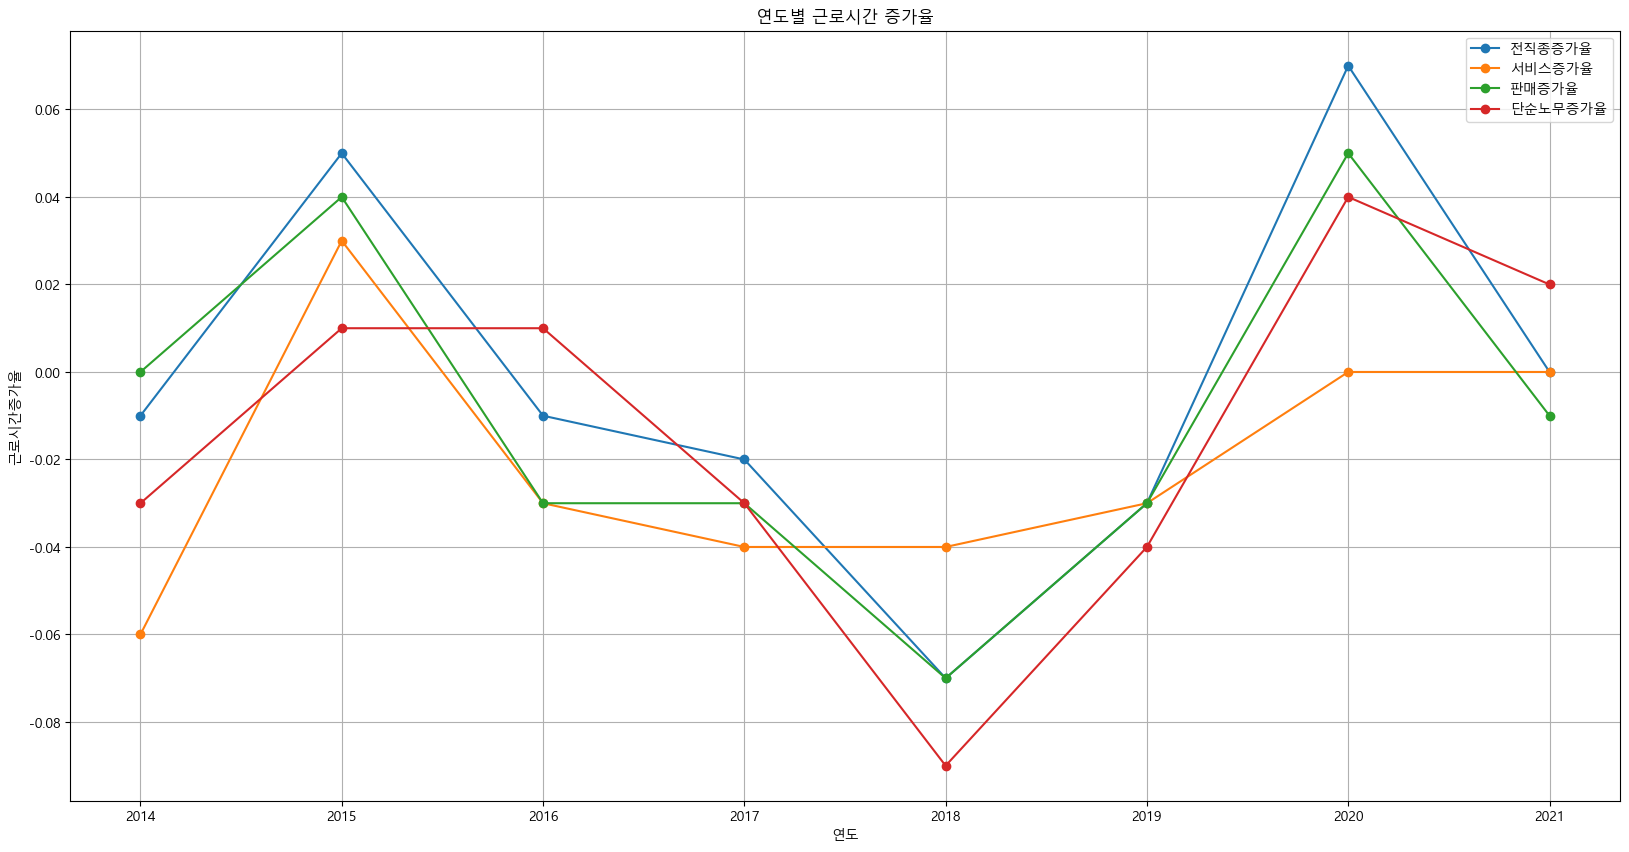

In [ ]:
data_time.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)
plt.xlabel('연도')
plt.ylabel('근로시간증가율')
plt.title('연도별 근로시간 증가율')

plt.show()